# SVM и его ядра
__Суммарное количество баллов: 10__

### Задание 1 (7 баллов)

Примените метод SVM (например, из библиотеки sklearn) для датасета blobs2.

Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [43]:
import pandas as pd
from sklearn import svm

blobs = pd.read_csv("blobs2.csv")

classifiers = [svm.SVC(kernel="linear"),
svm.SVC(kernel="poly", gamma=2),
svm.SVC(kernel="poly", gamma=3),
svm.SVC(kernel="poly", gamma=5),
svm.SVC(kernel="poly", gamma=15),
svm.SVC(kernel="rbf")]


X = blobs[["x", "y"]]
y = blobs.label

for clf in classifiers:
    clf.fit(X,y)

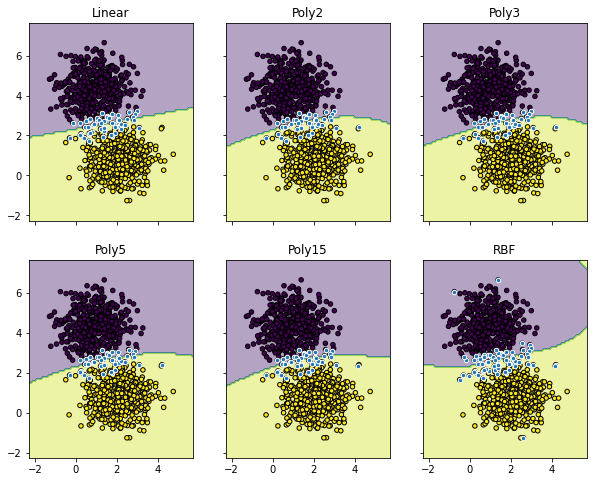

In [46]:
import numpy as np
from matplotlib import pyplot as plt
from itertools import product


x_min, x_max = X.x.min() - 1, X.x.max() + 1
y_min, y_max = X.y.min() - 1, X.y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1, 2]),
                        classifiers,
                        ['Linear', 'Poly2', 'Poly3',
                         'Poly5', 'Poly15', 'RBF']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X.x, X.y, c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
                                  s=20, edgecolor='w')

    #axarr[idx[0], idx[1]].legend(["A","B","C"])            
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### Задание 2 (3 балла)

Примените метод SVM на датасетах cancer и spam, разбитый предварительно на train (80%) и validate (20%). 

Сравните время работы SVM и Random Forest при близкой точности.

In [4]:
def read_cancer_dataset(path_to_csv):
    df = pd.read_csv(path_to_csv)
    df = df.sample(frac=1).reset_index(drop=True)
    X = df.loc[:, df.columns != 'label']
    y = df.label.astype('category')
    y = df.label.apply(lambda x: 1 if x=='M' else 0)
    return (X,y)

def read_spam_dataset(path_to_csv):
    df = pd.read_csv(path_to_csv)
    df = df.sample(frac=1).reset_index(drop=True)
    df.capital_run_length_average = (df.capital_run_length_average-df.capital_run_length_average.mean())/df.capital_run_length_average.std()
    df.capital_run_length_longest = (df.capital_run_length_longest-df.capital_run_length_longest.mean())/df.capital_run_length_longest.std()
    df.capital_run_length_total = (df.capital_run_length_total-df.capital_run_length_total.mean())/df.capital_run_length_total.std()
    X = df.loc[:, df.columns != 'label']
    y = df.label
    return (X,y)

In [35]:
import sklearn.model_selection as msel
from sklearn.ensemble import RandomForestClassifier

X, y = read_cancer_dataset("cancer.csv")
X_train,X_test,y_train,y_test = msel.train_test_split(X,y,train_size=0.8, shuffle=False)

def TestRandomForest():
    rf_clf = RandomForestClassifier(max_depth=5, n_estimators=150, random_state = 0)
    rf_clf.fit(X_train, y_train)

    rf_accuracy = np.sum((rf_clf.predict(X_test) == y_test))/len(y_test)

    return rf_accuracy

def TestSVC():
    svc_clf = svm.SVC(kernel="linear")
    svc_clf.fit(X_train, y_train)

    svc_accuracy = np.sum((svc_clf.predict(X_test) == y_test))/len(y_test)

    return svc_accuracy

In [41]:
%timeit TestRandomForest()
print("Random forest accuracy: ", TestRandomForest())

193 ms ± 6.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Random forest accuracy:  0.9385964912280702


In [38]:
%timeit TestSVC()
print("SVC accuracy: ", TestSVC())

521 ms ± 4.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
SVC accuracy:  0.9473684210526315


In [47]:
X, y = read_spam_dataset("spam.csv")
X_train,X_test,y_train,y_test = msel.train_test_split(X,y,train_size=0.8, shuffle=False)

In [48]:
%timeit TestRandomForest()
print("Random forest accuracy: ", TestRandomForest())

361 ms ± 4.28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Random forest accuracy:  0.9315960912052117


In [49]:
%timeit TestSVC()
print("SVC accuracy: ", TestSVC())

330 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
SVC accuracy:  0.9391965255157437
